In [118]:
#importing libraries
import time
import os 
import sys
import io
import pandas as pd
from statistics import mean 
from statistics import stdev 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [119]:
from google.colab import files 
#please use this cell to upload the data file in case you are using google colab to run the file
  
uploaded = files.upload()



Saving action_1_signal_raw.data to action_1_signal_raw (2).data


In [121]:

df = pd.read_csv(io.StringIO(uploaded['action_1_signal_raw.data'].decode('utf-8'))) #please provide a path to the file
print('Raw DataFrame') 
print('******************************************************************')
print(df)


Raw DataFrame
******************************************************************
      Time (seconds)         f0         f1  ...        f16        f17        f18
0           0.025001  30.360140  17.579988  ...  29.765759  10.876992  26.017893
1           0.049414  32.726293  25.167735  ...  60.385098  23.847597  18.236608
2           0.073827  21.150129  18.172881  ...  20.868706  13.251215  21.493155
3           0.098240  19.170769  13.792303  ...  40.029688  41.862798  18.395882
4           0.122652  29.377692  27.293459  ...  26.881990  17.811212  31.782183
...              ...        ...        ...  ...        ...        ...        ...
1280       31.273544  21.119562  17.921429  ...  30.636521  28.259410  19.226922
1281       31.297957  35.416309  23.966281  ...  30.850540  18.101805  17.181565
1282       31.322369  12.316860  24.217272  ...  40.946000  25.173406  13.495703
1283       31.346782  18.186439  14.902867  ...  15.805895  10.803608  13.626778
1284       31.371195  19.676

In [122]:

#saving the dataframe in a csv file
df.to_csv('action_signal_raw.csv', index = None) 




In [123]:
#Performing mean operation of features row wise in order to convert into a single feature column
data = df.iloc[:,1:len(df.columns)+1] #selecting the columns(features) for performing row wise mean operation
average = data.mean(axis=1) #finding the row wise mean
new_data = {'Time(Seconds)':df['Time (seconds)'],
            'f0':average}
new_df = pd.DataFrame(new_data)
print('Mean of the sensor data ')
print('*****************************************************************************')
print(new_df)



Mean of the sensor data 
*****************************************************************************
      Time(Seconds)         f0
0          0.025001  22.017106
1          0.049414  25.195539
2          0.073827  20.222812
3          0.098240  27.717170
4          0.122652  26.836969
...             ...        ...
1280      31.273544  25.841214
1281      31.297957  28.558043
1282      31.322369  26.405433
1283      31.346782  21.207625
1284      31.371195  24.452137

[1285 rows x 2 columns]


In [124]:
#preprocessing the data 
column = new_df['f0']
minimum=column.min()
maximum=column.max()
new_df['f0'] = new_df['f0']/maximum
print('Below is the mean value of the standardised data')
print('*********************************')
print(new_df)


Below is the mean value of the standardised data
*********************************
      Time(Seconds)        f0
0          0.025001  0.020997
1          0.049414  0.024029
2          0.073827  0.019286
3          0.098240  0.026433
4          0.122652  0.025594
...             ...       ...
1280      31.273544  0.024644
1281      31.297957  0.027235
1282      31.322369  0.025182
1283      31.346782  0.020225
1284      31.371195  0.023320

[1285 rows x 2 columns]


In [125]:
#performing clustering for categorizing the data based on the sensor values
#finding optimal value for number of clusters using within cluster sum of squares 

data = new_df.iloc[:,1:]
wcss = [] #empty list for calculating wcss after each iter
for i in range(1,50):
  kmeans =KMeans(i) 
  kmeans.fit(data)  
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [126]:
print('below is the list of the within cluster sum of squares ')
print(wcss)

below is the list of the within cluster sum of squares 
[31.05427324132851, 6.8477724034088645, 3.9659542240050194, 2.279241292462416, 1.4609855987967042, 1.0239771407857283, 0.7166714850907776, 0.4946072617111933, 0.3989045115694888, 0.3143436756077704, 0.2454002481284856, 0.20818052641532225, 0.18022311160850193, 0.1570551962718484, 0.1379098505936585, 0.12228139134390685, 0.10645051647459683, 0.08811466278211172, 0.07707320998568173, 0.07133323923787198, 0.06602807425507408, 0.058390550747653085, 0.05301523348098676, 0.049171765410878615, 0.04667168060073462, 0.04196352288922128, 0.03872733774883736, 0.03663544363472042, 0.03379715755235637, 0.031928264785927404, 0.02961737788601779, 0.02723709360231403, 0.025920228920379592, 0.02396328619574783, 0.022759458686136096, 0.021074714964484834, 0.01964028520182267, 0.018515529791408428, 0.017678414398577966, 0.016262379022331526, 0.015045121909865275, 0.014613332660154056, 0.013620520574756793, 0.012579450275768747, 0.01171303322010151, 

Text(0, 0.5, 'Within-cluster-sum-of-squares')

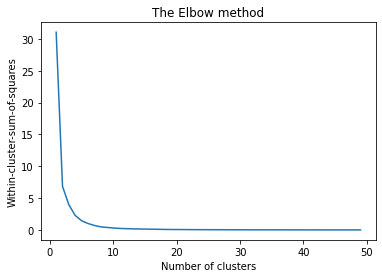

In [127]:
# We now use the elbow method to predict the number of clusters requires
number_of_clusters = range(1,50)
plt.plot(number_of_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster-sum-of-squares')

In [128]:
#results from clustering 
kmeans_new = KMeans(7)
identified_clusters = kmeans_new.fit_predict(data) #predicting dependent of time
new_df['Cluster'] = identified_clusters
print('identified cluster groups labels')
print('************************************')
print(new_df)
print('************************************')


identified cluster groups labels
************************************
      Time(Seconds)        f0  Cluster
0          0.025001  0.020997        5
1          0.049414  0.024029        5
2          0.073827  0.019286        5
3          0.098240  0.026433        5
4          0.122652  0.025594        5
...             ...       ...      ...
1280      31.273544  0.024644        5
1281      31.297957  0.027235        5
1282      31.322369  0.025182        5
1283      31.346782  0.020225        5
1284      31.371195  0.023320        5

[1285 rows x 3 columns]
************************************


In [132]:
# Grouping of clusters
total_time= [] #dictionary for storing the total time
time_length = [] # dictionary for storing the average time length
label_list=[]
for i in range(len(length)):
  label_list.append('action')
  lt= []
  sum = 0
  index = new_df[new_df['Cluster'] == i].index.tolist()
  for j in index :
    sum = sum + new_df['Time(Seconds)'][j] # total time in a cluster 
    lt.append(new_df['Time(Seconds)'][j])
  time_length.append(mean(lt)) #performing standard deviation in order to find the standard length/duration of the time of a cluster
  total_time.append(sum)
  index_list.append(index)

output_data = {'Time(Seconds)':total_time,'Length(Seconds)':time_length,'Label(String)':label_list}
op_df = pd.DataFrame(output_data)
print('Output DataFrame')
print('***********************************************************************************')
op_df.sort_values("Time(Seconds)", axis = 0, ascending = True, 
                 inplace = True, na_position ='last')
print(op_df)

Output DataFrame
***********************************************************************************
   Time(Seconds)  Length(Seconds) Label(String)
4      62.941221         7.867653        action
2     591.254534        15.559330        action
3    1031.362777        15.626709        action
0    1080.657174        14.603475        action
6    2927.316870        12.839109        action
1    6718.621264        16.923479        action
5    7759.902154        16.371102        action
